In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

import yfinance as yahoo_finance
import seaborn as sns
import datetime
import time
import pandas_datareader.data as web
import pandas_datareader as pdr

%matplotlib inline

Empty DataFrame
Columns: []
Index: [2013-01-01 00:00:00, 2013-01-02 00:00:00, 2013-01-03 00:00:00, 2013-01-04 00:00:00, 2013-01-05 00:00:00]
connected to yahoo
connected to yahoo
connected to yahoo
connected to yahoo
connected to yahoo
connected to yahoo
connected to yahoo
connected to yahoo
connected to yahoo
connected to yahoo
connected to yahoo


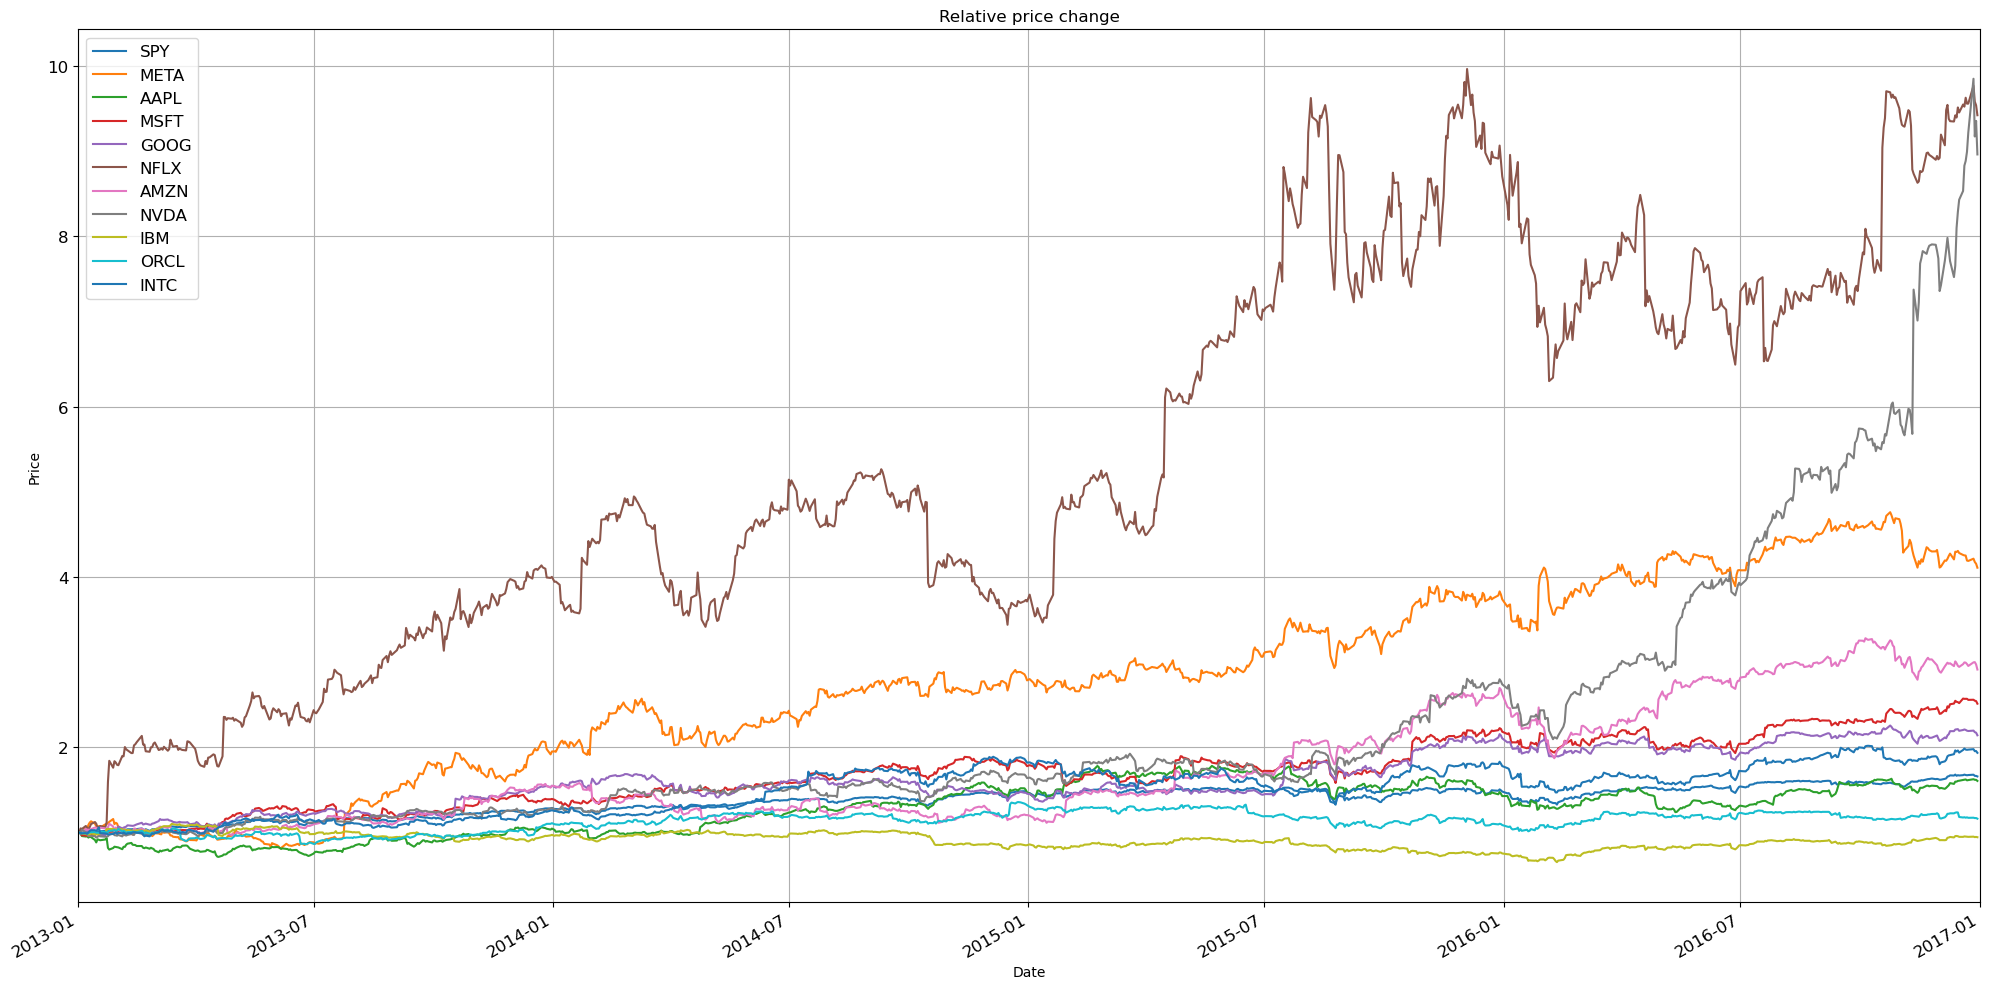

In [6]:
def f_plot_selected(df, columns, start_index, end_index):
    """Plot the desired columns over index values in the given range."""
    # takes a dataframe, columns (list) that we want to print and range of rows
    # note: df.ix is deprecated now
    f_plot_data(df.loc[start_index:end_index])        
    # use df.loc not df.iloc since we use datetime as index

def f_get_data(symbols, dates, start_time, today):
    """Read stock data (adjusted close) for given symbols from yahoo finance"""
    df = pd.DataFrame(index=dates)
    print(df.head())
    
    if 'SPY' not in symbols:  # add SPY for reference, if absent
        symbols.insert(0, 'SPY')

    for symbol in symbols:
    # yahoo gives only daily historical data, more granular data stream is hard to get for free
        connected = False
        while not connected:
            try:
                ticker_df = web.get_data_yahoo(symbol, start=start_time, end=today)
                connected = True
                print('connected to yahoo')
            except Exception as e:
                print("type error, something is wrong: " + str(e))
                time.sleep( 10 )
                pass   
        
        # reset index from dates to index numbers
        # print(ticker_df.head(2))
        #       Date        High                                                          
        # 2017-01-03  128.190002    
        # 2017-01-04  130.169998 
        ticker_df = ticker_df.reset_index()
        # print(ticker_df.head(2))
        #         Date        High  
        # 0 2017-01-03  128.190002   
        # 1 2017-01-04  130.169998
        ticker_df.set_index('Date', inplace=True, drop=False) 
        
        df_temp = ticker_df[['Date','Adj Close']]# 'Date',"Open","High","Low",'Adj Close'
        df_temp = df_temp.rename(columns={'Adj Close': symbol})
        df = df.join(df_temp[symbol])
        
        if symbol == 'SPY':  # drop dates SPY did not trade
            df = df.dropna(subset=["SPY"])
            
    return df

def f_normalize_data(df):
    """normalizes stock data in respect to price in day 1, 
    this way price on the first day starts at 1$ for any given stock"""
    #return df/df.ix[0,:]      # deprecated option
    return df/df.iloc[0,:]     # use df.iloc not df.loc since index is number
    
def f_plot_data(df, title="Stock prices"):
    """Plot stock prices with a custom title and meaningful axis labels."""
    
    ax = df.plot(title=title, fontsize=12, figsize=(20, 10))
    ax.set_xlabel("Date")
    ax.set_ylabel("Price")
    ax.set_xlim([datetime.datetime(2013, 1, 1), datetime.datetime(2017, 1, 1)])
    
    #plt.figure(figsize=(20, 10), dpi= 120, facecolor='w', edgecolor='k')
    plt.title('Relative price change')
    plt.legend(loc='upper left', fontsize=12)
    plt.tight_layout()
    plt.style.use('bmh')
    plt.grid(True)
    plt.show()

def f_run():
    # Define a date range
    start_time = datetime.datetime(2013, 1, 1)
    # end_time = datetime.datetime(2018, 6, 20)
    today = datetime.datetime(2017, 1, 1)
    dates = pd.date_range(start_time, today)

    # Choose stock symbols to read
    symbols = ["META","AAPL","MSFT","GOOG","NFLX","AMZN","NVDA","IBM","ORCL","INTC"]
    # SPY will be added in f_get_data() function automatically
    
    # Get stock data
    df = f_get_data(symbols, dates, start_time, today)
    df_norm = f_normalize_data(df)

    # Slice and plot
    f_plot_selected(df_norm, ["FB","AAPL","MSFT","GOOG","NFLX","AMZN","NVDA","IBM","ORCL","INTC"], start_time, today)
    #return df

f_run()

In [7]:
symbols = ["META","AAPL","MSFT","GOOG","NFLX","AMZN","NVDA","IBM","ORCL","INTC"]

start_time = datetime.datetime(2013, 1, 1)
today = datetime.datetime(2017, 1, 1)

df = web.DataReader(symbols,'yahoo',start=start_time, end=today)

df.drop(df.index[range(0,44)],inplace=True)
df.drop(df.index[range(-4,0)],inplace=True)

In [31]:
def ohlc(data):
    dataframe = pd.DataFrame({"Open":df[("Open",data)],
                        "High":df[("High",data)],
                        "Low":df[("Low",data)],
                        "Close":df[("Close",data)]})
    return dataframe
    
symbols = ["META","AAPL","MSFT","GOOG","NFLX","AMZN","NVDA","IBM","ORCL","INTC"]

aapl = ohlc("AAPL").to_numpy()
meta = ohlc("META").to_numpy()
msft = ohlc("MSFT").to_numpy()
goog = ohlc("GOOG").to_numpy()
nflx = ohlc("NFLX").to_numpy()
amzn = ohlc("AMZN").to_numpy()
nvda = ohlc("NVDA").to_numpy()
ibm = ohlc("IBM").to_numpy()
orcl = ohlc("ORCL").to_numpy()
intc = ohlc("INTC").to_numpy()

In [ ]:
X = np.concatenate(([aapl],[meta],[msft],[goog],[nflx],[amzn],[nvda],[ibm],[orcl],[intc]),axis=0)
print(X.shape)
print(X)

In [34]:
X1 = X.reshape(10,16,60,4)
X1 = np.transpose(X1,axes=(1,0,2,3))

In [35]:
from operator import add

def labelGenerate(y):
    length = y.shape[1]
    result = []
    for company in y:
        company_result = []
        for i in range(1, length):
            old = i - 1
            cur = i
            high_open = (company[cur,0] - company[old,1])/company[cur,0]
            low_open = (company[cur,0] - company[old,2])/company[cur,0]
            close_diff = (company[cur,3] - company[old,3])/company[old,3]
            if (high_open > 0.05):
                label = [0,0,0,1]
            elif (high_open >= 0 and high_open <= 0.05):
                label = [0,0,1,0]
            elif (low_open < -0.05):
                label = [1,0,0,0]
            elif (low_open >= -0.05 and low_open < 0):
                label = [0,1,0,0]
            
            if (close_diff >= 0.03):
                close_label = [1,0.5,0,0]
            elif (close_diff < 0.03 and close_diff >= 0):
                close_label = [0.5,1,0,0]
            elif (close_diff <= -0.03):
                close_label = [0,0,0.5,1]
            elif (close_diff > -0.03 and close_diff < 0):
                close_label = [0,0,1,0.5]
            
            company_result.append(list( map(add, label, close_label) ))
        result.append(company_result)
        
    return np.array(result)

def splitXy(X):
    X = X[:,range(0,55),:]
    y = X[:,range(-6,0),:]
    y = labelGenerate(y)
    return X,y
    

[[[0.  0.  2.  0.5]
  [0.5 1.  1.  0. ]
  [0.  0.  2.  0.5]
  [0.5 1.  1.  0. ]
  [0.5 2.  0.  0. ]]

 [[0.5 2.  0.  0. ]
  [0.  1.  1.  0.5]
  [0.  1.  1.  0.5]
  [0.  1.  1.  0.5]
  [0.  1.  1.  0.5]]

 [[0.5 2.  0.  0. ]
  [0.5 2.  0.  0. ]
  [0.  0.  2.  0.5]
  [0.  0.  2.  0.5]
  [0.  1.  1.  0.5]]

 [[0.5 2.  0.  0. ]
  [0.  1.  1.  0.5]
  [0.  1.  1.  0.5]
  [0.  1.  1.  0.5]
  [0.  1.  1.  0.5]]

 [[0.5 2.  0.  0. ]
  [0.5 2.  0.  0. ]
  [0.  1.  1.  0.5]
  [0.  1.  0.5 1. ]
  [0.  1.  1.  0.5]]

 [[0.5 2.  0.  0. ]
  [0.  1.  1.  0.5]
  [0.5 2.  0.  0. ]
  [0.  1.  1.  0.5]
  [0.  1.  1.  0.5]]

 [[0.5 2.  0.  0. ]
  [0.  1.  1.  0.5]
  [0.5 2.  0.  0. ]
  [0.  0.  1.5 1. ]
  [0.5 2.  0.  0. ]]

 [[0.5 2.  0.  0. ]
  [0.  1.  1.  0.5]
  [0.5 2.  0.  0. ]
  [0.  1.  1.  0.5]
  [0.  1.  1.  0.5]]

 [[0.5 2.  0.  0. ]
  [0.  1.  1.  0.5]
  [0.5 2.  0.  0. ]
  [0.  1.  1.  0.5]
  [0.5 2.  0.  0. ]]

 [[0.5 2.  0.  0. ]
  [0.5 2.  0.  0. ]
  [0.5 2.  0.  0. ]
  [0.  1.  1.  0.5]
  